PyTorch是一个Python的科学计算库，它有以下特点：
- 类似于Numpy，但是它可以使用GPU
- 可以定义深度学习模型，灵活地进行深度学习模型的训练和使用

PyTorch官方英文文档：https://pytorch.org/docs/stable/torch.html?

PyTorch官方中文文档：https://pytorch-cn.readthedocs.io/zh/latest/

In [1]:
import torch
import numpy as np

# 张量的简介

主要是PyTorch中的数据结构——Tensor

Tensor与Numpy中的ndarray类似，唯一的区别是Tensor可以在GPU上加速运算

<img style="float: center;" src="images/0.png" width="60%">

Tensor一共有8个属性：
1. data: 被包装的Tensor
2. dtype: 张量的数据类型，用的最多的是float32
3. shape: 张量的形状，如(64, 3, 224, 224)
4. device: 张量所在的设备，CPU或者GPU，张量只有在GPU上才能加速
5. requires_grad: 是否需要梯度
6. grad: data的梯度
7. grad_fn: fn表示function的意思，记录创建张量时用到的方法，比如加法，乘法，这个操作在求导的过程需要用到，Tensor的Function，是自动求导的关键
8. is_leaf: 是否是叶子节点（张量）

# 张量的创建

## 直接创建
由原始数据直接生成张量，张量类型由原始数据类型决定

torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)
- data：可以是list，也可以是numpy
- dtype：数据的类型，默认与data一致
- device：所在的设备
- requires_grad：是否需要梯度，搭建神经网络的时候需要求导的那些参数要设置为true
- pin_memory：是否存于锁页内存

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

## numpy数组创建

由已有的numpy数组来生成张量（同时反过来也可以）

注意张量和numpy数组在CPU上共用一块内存区域，改变其中一个另一个也会随之改变

In [3]:
# numpy转tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [4]:
# tensor转numpy
t = torch.ones(5)
n = t.numpy()
n

array([1., 1., 1., 1., 1.], dtype=float32)

## 数值创建

新的张量将继承已有的张量的数据属性（结构、类型），也可以重新指定新的数据类型

### 零张量

torch.zeros(\*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False) 

In [5]:
out_t = torch.tensor([1])
t = torch.zeros((3, 3), out=out_t)

print(out_t, '\n', t)
print(id(t), id(out_t), id(t) == id(out_t))   # 这个看内存地址

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
2039376008752 2039376008752 True


In [6]:
torch.zeros_like(out_t)   # 这里的input要是个张量

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

### 单位张量

torch.ones()

torch.ones_like()

### 自定义数值张量

torch.full()

torch.full_like()

In [7]:
torch.full((3,3), 10)

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])

### 范围张量

[start, end)，左闭右开

torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

In [8]:
torch.arange(2, 10, 2)

tensor([2, 4, 6, 8])

### 均分张量

[start, end]，左闭右闭，$(end-start) / (steps-1)$

torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

In [9]:
torch.linspace(2, 10, 5), torch.linspace(2, 10, 6) 

(tensor([ 2.,  4.,  6.,  8., 10.]),
 tensor([ 2.0000,  3.6000,  5.2000,  6.8000,  8.4000, 10.0000]))

### 对数均分张量

[start, end]，左闭右闭，$(end-start) / (steps-1)$

torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

In [10]:
torch.logspace(2, 10, 5)

tensor([1.0000e+02, 1.0000e+04, 1.0000e+06, 1.0000e+08, 1.0000e+10])

### 对角矩阵

默认是方阵

torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

In [11]:
torch.eye(3), torch.eye(3, 4)

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]))

## 概率分布创建

### 正态分布（高斯分布）

torch.normal(mean, std, size, out=None)
- mean为标量，std为标量
- mean为标量，std为张量
- mean为张量，std为标量
- mean为张量，std为张量

In [12]:
# 第一种模式 - 均值是标量，方差是标量 
# 此时产生的是一个分布，从这一个分部种抽样相应的个数
# 所以这个必须指定size，也就是抽取多少个数
t_normal = torch.normal(0, 1, size=(4,))
print(t_normal)     # 来自同一个分布

# 第二种模式 - 均值是标量，方差是张量
# 此时会根据方差的形状大小，产生同样多个分布，每一个分布的均值都是那个标量
std = torch.arange(1, 5, dtype=torch.float)
print(std.dtype)
t_normal2 = torch.normal(1, std)
# 也产生来四个数，但是这四个数分别来自四个不同的正态分布，这些分布均值相等
print(t_normal2)

# 第三种模式 - 均值是张量，方差是标量
# 此时也会根据均值的形状大小，产生同样多个方差相同的分布
# 从这几个分布中分别取一个值作为结果
mean = torch.arange(1, 5, dtype=torch.float)
t_normal3 = torch.normal(mean, 1)
print(t_normal3)     # 来自不同的分布，但分布里面方差相等

# 第四种模式 - 均值是张量，方差是张量
# 此时需要均值的个数和方差的个数一样多，分别产生这么多个正态分布，从这里面抽取一个值
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t_normal4 = torch.normal(mean, std)
print(t_normal4)  # 来自不同的分布，各自有自己的均值和方差

tensor([ 0.1618,  2.3647, -0.8457,  0.0597])
torch.float32
tensor([-0.0792, -1.5373, -0.3282,  3.8137])
tensor([0.8567, 0.0971, 4.2862, 5.4753])
tensor([0.8125, 2.5844, 8.5292, 7.8350])


### 标准正太分布

torch.randn(\*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

torch.randn_like()

### 均匀分布

torch.rand(), torch.rand_like()：在[0, 1)生成均匀分布

torch.rand(\*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

torch.randint(), torch.randint_like()：在[low, hight)生成整数均匀分布

torch.randint(low=0, high, size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)

### 乱序索引

生成[0, n-1]的随机排列，n为张量的长度

torch.randperm(n, out=None, dtype=torch.int64, layout=torch.strided, device=None, requires_grad=False)

### 伯努利分布

以input为概率，生成伯努利分布（0-1分布，两点分布）

torch.bernoulli(input, \*, generator=None, out=None)

# 张量的操作

张量运算有超过100种。https://pytorch.org/docs/stable/torch.html

所有这些运算都可以在GPU上运行

## 基本操作

### 拼接

torch.cat(tensors, dim=0, out=None)：将张量按维度dim进行拼接，tensors为张量序列，dim为拼接维度，只有浮点数可以拼接，long类型无法拼接

In [13]:
t = torch.ones((2, 3))
print(t, t.shape)

t_0 = torch.cat([t, t], dim=0)       # 行拼接
t_1 = torch.cat([t, t], dim=1)    # 列拼接
print(t_0, t_0.shape)
print(t_1, t_1.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([4, 3])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) torch.Size([2, 6])


torch.stack(tensors, dim=0, out=None)：新创建的维度dim上进行拼接，tensors表示张量序列，dim为拼接维度，新加了一个Z轴，dim=0时横向看，dim=1时纵向看

In [14]:
t_stack = torch.stack([t,t,t], dim=0)
print(t_stack, t_stack.shape)

t_stack1 = torch.stack([t, t, t], dim=1)
print(t_stack1, t_stack1.shape)

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]) torch.Size([3, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]) torch.Size([2, 3, 3])


### 切分

torch.chunk(input, chunks, dim=0)：将张量按维度dim进行平均切分（向上取整），返回值时张量列表。

如果不能整除，最后一份张量小于其他张量，chunks代表一共要切成几份

In [15]:
a = torch.ones((2, 7))  # 7
# 第一个维度切成三块， 那么应该是(2,3), (2,3), (2,1)
# 因为7不能整除3，所以每一份应该向上取整，最后不够的有多少算多少
list_of_tensors = torch.chunk(a, dim=1, chunks=3)
print(list_of_tensors)
for idx, t in enumerate(list_of_tensors):
    print(f"第{idx+1}个张量：{t}, shape is {t.shape}")

(tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1.],
        [1.]]))
第1个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第2个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第3个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


torch.split(tensor, split_size_or_sections, dim=0)：将张量按维度dim切分，这个函数比较强大，可以指定切分的长度

split_size_or_sections：每一份的长度，为list时，按list元素切分，长度总和必须为维度大小

In [16]:
t = torch.ones((2, 5))

# [2 , 1, 2]， 这个要保证这个list的大小正好是那个维度的总大小，这样才能切
list_of_tensors = torch.split(t, [2, 1, 2], dim=1)
for idx, t in enumerate(list_of_tensors):
    print(f"第{idx+1}个张量：{t}, shape is {t.shape}")

第1个张量：tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
第2个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
第3个张量：tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])


### 索引

torch.index_select(input, dim, index, out=None)：维度dim上，按index索引数据，返回值，以index索引数据拼接的张量【按照索引值查找，指定类型long】

In [17]:
t = torch.randint(0, 9, size=(3, 3))     #  从0-8随机产生数组成3*3的矩阵
print(t)

idx = torch.tensor([0, 2], dtype=torch.long)   # 这里的类型注意一下，要是long类型
t_select = torch.index_select(t, dim=0, index=idx)  #第0行和第2行拼接返回
print(t_select)

idx = torch.tensor([0, 2], dtype=torch.long)   # 这里的类型注意一下，要是long类型
t_select = torch.index_select(t, dim=1, index=idx)  #第0列和第2列拼接返回
print(t_select)

tensor([[2, 0, 4],
        [6, 0, 2],
        [4, 4, 0]])
tensor([[2, 0, 4],
        [4, 4, 0]])
tensor([[2, 4],
        [6, 2],
        [4, 0]])


torch.masked_select(input, mask, out=None)：按mask中的True进行索引

【按照索引条件查找，指定类型mask】

- 返回值：一维张量
- input：要索引的张量
- mask：与input同形状的布尔类型张量

In [18]:
mask = t.ge(5)   # le<=5, ge>=5, gt>5, lt<5
print("mask: \n", mask)

t_select1 = torch.masked_select(t, mask)   # 选出t中大于5的元素
print(t_select1)

mask: 
 tensor([[False, False, False],
        [ True, False, False],
        [False, False, False]])
tensor([6])


### 变换

torch.reshape(input, shape)：改变张量的形状
- input：源张量
- shape：新张量的形状

当张量在内存中时连续时，新张量与input共享数据内存，一个改变另一个也改变

In [19]:
t = torch.randperm(8)   # randperm是随机排列的一个函数
print(t)

# -1的话就是根据后面那两个参数，计算出-1这个值，然后再转
t_reshape = torch.reshape(t, (-1, 2, 2))
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

t[0] = 1024
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

print("t.data 内存地址:{}".format(id(t.data)))
# 这个注意一下，两个是共内存的
print("t_reshape.data 内存地址:{}".format(id(t_reshape.data)))

tensor([4, 7, 3, 0, 1, 6, 2, 5])
t:tensor([4, 7, 3, 0, 1, 6, 2, 5])
t_reshape:
tensor([[[4, 7],
         [3, 0]],

        [[1, 6],
         [2, 5]]])
t:tensor([1024,    7,    3,    0,    1,    6,    2,    5])
t_reshape:
tensor([[[1024,    7],
         [   3,    0]],

        [[   1,    6],
         [   2,    5]]])
t.data 内存地址:2039392707504
t_reshape.data 内存地址:2039392707504


torch.transpose(input, dim0, dim1)：交换张量的两个维度，矩阵转置常用。

In [20]:
t = torch.rand((2, 3, 4))      # 产生0-1之间的随机数
print(t)

# c*h*w, w*h*c, 这表示第0维和第2维进行交换
t_transpose = torch.transpose(t, dim0=0, dim1=2)
print(t_transpose)
print("t shape:{}\nt_transpose shape: {}".format(t.shape, t_transpose.shape))

tensor([[[0.8384, 0.1264, 0.1091, 0.4429],
         [0.8656, 0.0335, 0.4584, 0.0982],
         [0.0600, 0.6457, 0.3105, 0.0516]],

        [[0.8112, 0.8031, 0.5116, 0.6734],
         [0.4092, 0.0089, 0.5364, 0.8517],
         [0.1873, 0.8088, 0.5605, 0.5071]]])
tensor([[[0.8384, 0.8112],
         [0.8656, 0.4092],
         [0.0600, 0.1873]],

        [[0.1264, 0.8031],
         [0.0335, 0.0089],
         [0.6457, 0.8088]],

        [[0.1091, 0.5116],
         [0.4584, 0.5364],
         [0.3105, 0.5605]],

        [[0.4429, 0.6734],
         [0.0982, 0.8517],
         [0.0516, 0.5071]]])
t shape:torch.Size([2, 3, 4])
t_transpose shape: torch.Size([4, 3, 2])


torch.t(input)：2维张量的转置，相当于：torch.transpose(input, 0, 1)

torch.squeeze(input, dim=None, out=None)：压缩长度为1的维度。

dim若为None，移除所有长度为1的轴，若指定维度，当且仅当该轴长度为1时可以被移除。

In [21]:
t = torch.rand((1, 2, 3, 1))
t_sq = torch.squeeze(t)
t_0 = torch.squeeze(t, dim=0)
t_1 = torch.squeeze(t, dim=1)

print(t.shape)        # torch.Size([1, 2, 3, 1])
print(t_sq.shape)     # torch.Size([2, 3])
print(t_0.shape)     # torch.Size([2, 3, 1])
print(t_1.shape)     # torch.Size([1, 2, 3, 1])

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


torch.unsqueeze(input, dim, out=None)：依据dim扩展维度

## 数学运算

### 标量运算

可以分为三大类：

- 加减乘除
 - torch.add()
 - torch.addcdiv()
 - torch.addcmul()
 - torch.sub()
 - torch.div()
 - torch.mul()


- 对数指数幂
 - torch.log(input, out=None)
 - torch.log10(input, out=None)
 - torch.log2(input, out=None)
 - torch.exp(input, out=None)
 - torch.pow()


- 三角函数
 - torch.abs(input, out=None)
 - torch.acos(input, out=None)
 - torch.cosh(input, out=None)
 - torch.cos(input, out=None)
 - torch.asin(input, out=None)
 - torch.atan(input, out=None)
 - torch.atan2(input, out=None)

torch.add(input, alpha=1, other, out=None)：逐元素计算input+alpha\*other

alpha：乘项因子，权重

例如：y=wx+b，可以表示为：torch.add(b, w, x)

torch.addcdiv(input, value=1, tensor1, tensor2, out=None)：

$out_i=input_i+value\times \frac{tensor1_i}{tensor2_i}$

torch.addcmul(input, value=1, tensor1, tensor2, out=None)：

$out_i=input_i+value\times tensor1_i\times tensor2_i$

In [22]:
t_0 = torch.randn((3, 3))
t_1 = torch.ones_like(t_0)
t_add = torch.add(t_0, 10, t_1)

print("t_0:\n{}\nt_1:\n{}\nt_add_10:\n{}".format(t_0, t_1, t_add))

t_0:
tensor([[-0.4926, -0.9498, -0.4721],
        [-0.0935, -0.0196,  0.7111],
        [-0.0660, -0.3093,  1.6372]])
t_1:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t_add_10:
tensor([[ 9.5074,  9.0502,  9.5279],
        [ 9.9065,  9.9804, 10.7111],
        [ 9.9340,  9.6907, 11.6372]])


C:\Users\Huris\AppData\Local\Temp/ipykernel_10956/4014563599.py:3: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1050.)
  t_add = torch.add(t_0, 10, t_1)


### 向量运算

向量运算符只在一个特定轴上运算，将一个向量映射到一个标量或另外一个向量。

In [23]:
a = torch.arange(1,10).float()

print(torch.sum(a))
print(torch.mean(a))
print(torch.max(a))
print(torch.min(a))
print(torch.prod(a)) #累乘
print(torch.std(a))  #标准差
print(torch.var(a))  #方差
print(torch.median(a)) #中位数

tensor(45.)
tensor(5.)
tensor(9.)
tensor(1.)
tensor(362880.)
tensor(2.7386)
tensor(7.5000)
tensor(5.)


In [24]:
#cum扫描
a = torch.arange(1,10)

print(torch.cumsum(a,0))    # 累加
print(torch.cumprod(a,0))    # 累乘
print(torch.cummax(a,0).values)
print(torch.cummax(a,0).indices)
print(torch.cummin(a,0))

tensor([ 1,  3,  6, 10, 15, 21, 28, 36, 45])
tensor([     1,      2,      6,     24,    120,    720,   5040,  40320, 362880])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.return_types.cummin(
values=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1]),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]))


### 张量排序

In [25]:
#torch.sort和torch.topk可以对张量排序
a = torch.tensor([[9,7,8],[1,3,2],[5,6,4]]).float()
print(torch.topk(a,2,dim = 0),"\n")
print(torch.topk(a,2,dim = 1),"\n")
print(torch.sort(a,dim = 1),"\n")

#利用torch.topk可以在Pytorch中实现KNN算法

torch.return_types.topk(
values=tensor([[9., 7., 8.],
        [5., 6., 4.]]),
indices=tensor([[0, 0, 0],
        [2, 2, 2]])) 

torch.return_types.topk(
values=tensor([[9., 8.],
        [3., 2.],
        [6., 5.]]),
indices=tensor([[0, 2],
        [1, 2],
        [1, 0]])) 

torch.return_types.sort(
values=tensor([[7., 8., 9.],
        [1., 2., 3.],
        [4., 5., 6.]]),
indices=tensor([[1, 2, 0],
        [0, 2, 1],
        [2, 0, 1]])) 



### 矩阵运算

矩阵必须是二维的，类似torch.tensor([1, 2, 3])不是矩阵

矩阵的运算包括：
- 乘法
- 转置
- 求逆
- 求迹（nxn矩阵主对角线上元素之和）
- 范数
- 行列式
- 特征值/向量
- 分解

In [26]:
#矩阵乘法
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[2,0],[0,2]])
print(a@b)  #等价于torch.matmul(a,b) 或 torch.mm(a,b)

tensor([[2, 4],
        [6, 8]])


In [27]:
#矩阵转置
a = torch.tensor([[1.0,2],[3,4]])
print(a.t())

tensor([[1., 3.],
        [2., 4.]])


In [28]:
#矩阵逆，必须为浮点类型
a = torch.tensor([[1.0,2],[3,4]])
print(torch.inverse(a))

tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


In [29]:
#矩阵求trace
a = torch.tensor([[1.0,2],[3,4]])
print(torch.trace(a))

tensor(5.)


In [30]:
#矩阵求范数
a = torch.tensor([[1.0,2],[3,4]])
print(torch.norm(a))

tensor(5.4772)


In [31]:
#矩阵行列式
a = torch.tensor([[1.0,2],[3,4]])
print(torch.det(a))

tensor(-2.0000)


In [32]:
#矩阵特征值和特征向量
a = torch.tensor([[1.0,2],[-5,4]],dtype = torch.float)
print(torch.eig(a,eigenvectors=True))

#两个特征值分别是 2.5+2.7839j, 2.5-2.7839j 

torch.return_types.eig(
eigenvalues=tensor([[ 2.5000,  2.7839],
        [ 2.5000, -2.7839]]),
eigenvectors=tensor([[ 0.2535, -0.4706],
        [ 0.8452,  0.0000]]))


C:\Users\Huris\AppData\Local\Temp/ipykernel_10956/737208349.py:3: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:2894.)
  print(torch.eig(a,eigenvectors=True))


In [33]:
#矩阵QR分解, 将一个方阵分解为一个正交矩阵q和上三角矩阵r
#QR分解实际上是对矩阵a实施Schmidt正交化得到q

a = torch.tensor([[1.0,2.0],[3.0,4.0]])
q, r = torch.qr(a)
print(q,"\n")
print(r,"\n")
print(q@r)

tensor([[-0.3162, -0.9487],
        [-0.9487,  0.3162]]) 

tensor([[-3.1623, -4.4272],
        [ 0.0000, -0.6325]]) 

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000]])


C:\Users\Huris\AppData\Local\Temp/ipykernel_10956/3533039936.py:5: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:1937.)
  q, r = torch.qr(a)


In [34]:
#矩阵svd分解
#svd分解可以将任意一个矩阵分解为一个正交矩阵u,一个对角阵s和一个正交矩阵v.t()的乘积
#svd常用于矩阵压缩和降维
a=torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])

u,s,v = torch.svd(a)

print(u,"\n")
print(s,"\n")
print(v,"\n")

print(u@torch.diag(s)@v.t())

#利用svd分解可以在Pytorch中实现主成分分析降维

tensor([[-0.2298,  0.8835],
        [-0.5247,  0.2408],
        [-0.8196, -0.4019]]) 

tensor([9.5255, 0.5143]) 

tensor([[-0.6196, -0.7849],
        [-0.7849,  0.6196]]) 

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000],
        [5.0000, 6.0000]])


### 自动赋值运算

自动赋值运算通常在方法后有`_`作为后缀，例如：`x.copy_(y)`,`x.t_()`的操作会改变`x`的取值。

注意，自动赋值运算虽然可以节省内存，但是在求导时会因为丢失中间过程而导致一些问题，一般不鼓励使用。

In [35]:
tensor = torch.arange(10)
print(tensor, "\n")

tensor.add(5)
print(tensor, "\n")

tensor.add_(5)
print(tensor, "\n")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]) 



# 线性回归例子

分析一个变量与另外一（多）个变量之间关系的方法。

- 因变量：y
- 自变量：x
- 关系线性：$y=w\times x+b$

任务就是求解w，b

求解步骤：
1. 确定模型：Model->y=wx+b
2. 确定损失函数：$Loss=\frac{1}{m}\sum^m_{i=1}(y_i-\hat{y_i})^2$
3. 求解梯度更新w，b：$w=w-lr\times w.grad$，$b=b-lr\times b.grad$

In [36]:
# 首先我们得有训练样本X，Y， 这里我们随机生成
true_w = 2
true_b = 5
lr = 0.001

x = torch.rand(20, 1) * 10
y = true_w * x + (true_b + torch.randn(20, 1))

# 构建线性回归函数的参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)   # 这俩都需要求梯度

for iteration in range(10000):
    # 前向传播
    wx = torch.mul(w, x)
    y_pred = torch.add(b, wx)

    # 计算loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)    # 这种_的加法操作时从自身减，相当于-=
    w.data.sub_(lr * w.grad)

    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()

w.data, b.data

(tensor([2.1419]), tensor([4.1725]))

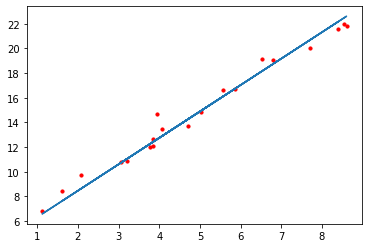

In [37]:
%matplotlib inline
from d2l import torch as d2l
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

d2l.plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10, c='r')
d2l.plt.plot(x.detach().numpy(), w.data * x + b.data)

# 思维导图

<img style="float: center;" src="images/1.png" width="90%">